In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import codecs
import time
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import random
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn import metrics
from operator import itemgetter

In [4]:
fraud_df = pd.read_csv('fraudDataSet.csv', encoding="SHIFT-JIS")
normal_df = pd.read_csv('normalDS.csv', encoding="SHIFT-JIS")

C:\Users\maxime.menu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
fraud_df['不正'] = 1
normal_df['不正'] = 0

In [6]:
data = normal_df.append(fraud_df)

In [7]:
print(data.columns.values)

['Unnamed: 0' 'トランザクションID' 'RESOLUTION1_NAME' 'MODIFIED'
 'NULLは新規分\r\n0605森田さん追加\r\nCB情報' '会員ID' 'クレジットカード名義' 'トランザクション 合計 金額'
 'トランザクション 日時' '会員登録日時' 'Billing Emailアドレス' 'Billing 住所' 'Billing フルネーム'
 'Billing POST_CODE' 'Billing POST_CODE緯度' 'Billing POST_CODE経度'
 '会員 Emailアドレス' '会員 フルネーム' 'InAuthデバイスID' 'InAuth デバイス 実IPアドレス'
 'InAuth デバイス 実IP 国名' 'InAuth ブラウザ ナビゲータ 言語' 'InAuth ユーザエージェント OS'
 'トランザクションスコア' 'InAuth デバイス位置情報 国コード\u3000' 'InAuth デバイス位置情報 都市'
 'InAuth デバイス位置情報 地域' 'InAuth デバイス位置緯度' 'InAuth デバイス位置経度' 'クレンズ済課金電話番号'
 'クレンズ済課金電話番号81' 'IPアドレス' 'InAuthブラウザクライアント情報言語' 'チェックイン日時' 'チェックアウト日時'
 '宿泊ID' '宿泊先名' '宿泊代表者フルネーム' 'トリップしたルール ' 'lang_comp' 'メール長さ' 'メール数字'
 'トランザクション曜日' 'トランザクション時間' 'チェックイン曜日' 'チェックイン時間' 'チェックアウト曜日' 'チェックアウト時間'
 'dtime' 'メールユーザーネーム' 'メールドメイン' 'ユーザ―長さ' 'ドメイン長さ' '不正']


In [8]:
data['会員登録日時'] = pd.to_datetime(data['会員登録日時'])
data['会員登録曜日'] = data['会員登録日時'].dt.dayofweek
data['会員登録時間'] = data['会員登録日時'].dt.hour

In [9]:
columns = ['Unnamed: 0','トリップしたルール ','トランザクションID','RESOLUTION1_NAME',
           'NULLは新規分\r\n0605森田さん追加\r\nCB情報','トランザクションスコア',
           'MODIFIED','トランザクション 日時','会員登録日時', 'チェックイン日時', 
           'チェックアウト日時']

data = data.drop(columns=columns)

In [10]:
data.head()

会員ID クレジットカード名義  トランザクション 合計 金額  \
0  TRA1450022515259        NaN           34560   
1  TRA1480017909104        NaN            5000   
2  TRA4330013781173        NaN           20250   
3  TRA4210015105108        NaN           94600   
4  TRA2720025725073        NaN            6000   

                Billing Emailアドレス                    Billing 住所 Billing フルネーム  \
0            NRE21258@YAHOO.CO.JP           藤岡市森290-6 レリアーナ205号         石川　雄太   
1        MORIKUMANNMA@YAHOO.CO.JP                  菊池郡大津町森219-5         溝辺　佳子   
2                 MTANI@NPSEC.COM                  射水市中野１２５１−７０          溪　守弘   
3  WEIXIAODONG25@FOREST.OCN.NE.JP       入間市向陽台１−１−２４駅前プラザ１６−５０３          魏　暁東   
4              TANYONGU@GMAIL.COM  徳島市南昭和町４丁目５６ー４浜の前マンション１１ー４０１        四宮　貴美子   

  Billing POST_CODE  Billing POST_CODE緯度  Billing POST_CODE経度  \
0          375-0004               36.278              139.077   
1          869-1217               32.866              130.895   
2          939-0273               36.740              137.056   
3          358-0001               35.841              139.391   
4          770-0944               34.056              134.561   

                     会員 Emailアドレス   ...   チェックアウト曜日 チェックアウト時間  \
0            NRE21258@YAHOO.CO.JP   ...           3        10   
1        MORIKUMANNMA@YAHOO.CO.JP   ...           4        11   
2                 MTANI@NPSEC.COM   ...           6        10   
3  WEIXIAODONG25@FOREST.OCN.NE.JP   ...           0        11   
4              TANYONGU@GMAIL.COM   ...           3        10   

                       dtime     メールユーザーネーム           メールドメイン ユーザ―長さ ドメイン長さ  \
0  0 days 17:00:00.000000000       NRE21258       YAHOO.CO.JP      8     11   
1  0 days 16:00:00.000000000   MORIKUMANNMA       YAHOO.CO.JP     12     11   
2  0 days 14:00:00.000000000          MTANI         NPSEC.COM      5      9   
3  0 days 18:00:00.000000000  WEIXIAODONG25  FOREST.OCN.NE.JP     13     16   
4  0 days 10:00:00.000000000       TANYONGU         GMAIL.COM      8      9   

  不正 会員登録曜日  会員登録時間  
0  0    3.0     0.0  
1  0    4.0     0.0  
2  0    5.0     0.0  
3  0    1.0     0.0  
4  0    6.0     0.0  

[5 rows x 45 columns]

In [11]:
data = data.fillna('Na')

In [12]:
for column in data:
    if data[column].dtype == np.object:
        print (column)
        le = preprocessing.LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))


会員ID
クレジットカード名義
Billing Emailアドレス
Billing 住所
Billing フルネーム
Billing POST_CODE
会員 Emailアドレス
会員 フルネーム
InAuthデバイスID
InAuth デバイス 実IPアドレス
InAuth デバイス 実IP 国名
InAuth ブラウザ ナビゲータ 言語
InAuth ユーザエージェント OS
InAuth デバイス位置情報 国コード　
InAuth デバイス位置情報 都市
InAuth デバイス位置情報 地域
IPアドレス
InAuthブラウザクライアント情報言語
宿泊先名
宿泊代表者フルネーム
dtime
メールユーザーネーム
メールドメイン
会員登録曜日
会員登録時間


In [30]:
def sampleData(DataFrame, ratio):
    df_size = len(DataFrame.index)
    sample_size = int(round(ratio * df_size))
    if sample_size == df_size:
        sample_size = sample_size - 1
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample
    
    else:
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample
    
def getOptimalMax(cv_scores, previousSteps):
    indices, scores_sorted = zip(*sorted(enumerate(cv_scores), key=itemgetter(1)))
    index_list = list(indices)
    index_list.reverse()
    scores_list = list(scores_sorted)
    scores_list.reverse()
    
    score_range = scores_list[0]-scores_list[len(scores_list)-1]
    optimal_score = 0
    optimal_index = 0
    for i in range(len(scores_list)-1):
        if index_list[i] > index_list[i+1]:
            
            if (scores_list[i]-scores_list[i+1])/(score_range*((index_list[i]-index_list[i+1])*previousSteps)) < 0.000002:
                continue
                
            else:
                optimal_score = scores_list[i]
                optimal_index = index_list[i]
                
        else:
            continue
    
    return optimal_index, optimal_score

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=90)
    plt.yticks(tick_marks, np.unique(y_test))
    plt.tight_layout()
    plt.ylabel('Fraud')
    plt.xlabel('CB')

In [14]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

label = data['不正'].unique()
DataFrameDict = {elem : pd.DataFrame for elem in label}
for key in DataFrameDict.keys():
    DataFrameDict[key] = data[:][data['不正'] == key]
    
for key in DataFrameDict.keys():
    train = sampleData(DataFrameDict[key], 0.7)
    train_df = train_df.append(train)
    
    test = DataFrameDict[key].drop(train.index)
    test_df = test_df.append(test)
    
y_train = train_df.pop('不正').values
X_train = train_df.values
y_test = test_df.pop('不正').values
X_test = test_df.values

In [15]:
print(len(np.unique(y_train)))
print(len(np.unique(y_test)))

2
2


In [16]:
t1 = time.clock()
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=1000,random_state=0,verbose=1,n_jobs=-1,class_weight = 'balanced')

forest.fit(X_train, y_train)
importances = forest.feature_importances_

importances_rank = sorted(range(len(importances)), key=lambda k: importances[k],reverse=True)

m, s = divmod((time.clock()-t1), 60)
h, m = divmod(m, 60)
print ('runtime: ' + "%d:%02d:%02d" % (h, m, s))

for i,feature in enumerate(importances_rank):
    if i > 20: break
    print ("%i feature %i (%f)" % (i+1,feature,importances[feature]))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.5min finished


runtime: 0:06:31
1 feature 27 (0.209640)
2 feature 5 (0.187349)
3 feature 10 (0.104211)
4 feature 2 (0.093529)
5 feature 15 (0.064307)
6 feature 14 (0.043684)
7 feature 41 (0.027280)
8 feature 24 (0.026928)
9 feature 39 (0.019815)
10 feature 30 (0.016032)
11 feature 21 (0.013107)
12 feature 22 (0.011634)
13 feature 12 (0.011386)
14 feature 34 (0.011111)
15 feature 40 (0.010973)
16 feature 37 (0.010785)
17 feature 20 (0.009948)
18 feature 6 (0.009450)
19 feature 7 (0.009270)
20 feature 4 (0.008941)
21 feature 19 (0.008119)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.4min finished
[Parallel(n_jobs=4)]: Done  42 tasks      

[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 100

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      |

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.2min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | 

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | e

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | el

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | 

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | e

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | 

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.4min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      |

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      

runtime: 7:19:02


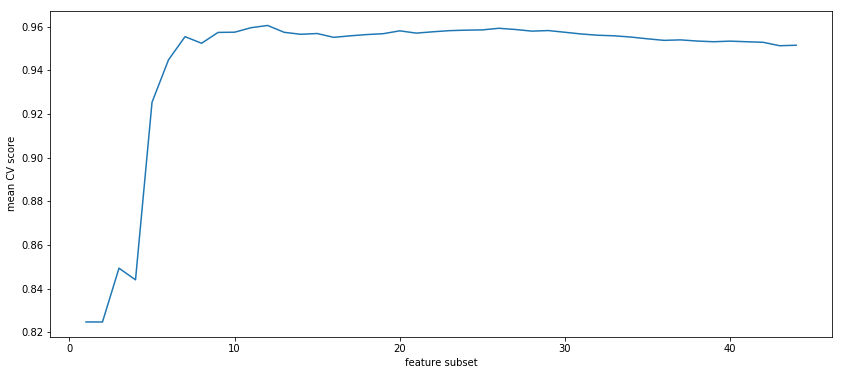

In [17]:
%matplotlib inline

t1 = time.clock()

cv_scores = []
feature_subset = []
n_features = len(data.columns)
for k in range(0,n_features-1,1):
    for j in range(k,k+1):
        feature_subset.append(importances_rank[j])
    cv_scores.append(cross_validation.cross_val_score(forest, X_train[:,feature_subset], y_train,scoring='f1_macro').mean())

m, s = divmod((time.clock()-t1), 60)
h, m = divmod(m, 60)
print ('runtime: ' + "%d:%02d:%02d" % (h, m, s))

plt.figure(figsize=(14,6))
plt.xlabel('feature subset')
plt.ylabel('mean CV score')
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
plt.show()

In [31]:
maxindex, maxvalue = getOptimalMax(cv_scores,1)
subset_size = 0 + (maxindex+1)

0.0010147412408229028


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [29]:
subset_size

4

In [32]:
final_feature_subset = []
for i in range(10):
    final_feature_subset.append(importances_rank[i])

In [33]:
clf = RandomForestClassifier(n_estimators=1000,random_state=0, oob_score = True, n_jobs=-1,class_weight = 'balanced',verbose=1)
clf.fit(X_train[:,final_feature_subset], y_train)
y_predict = clf.predict(X_test[:,final_feature_subset])
y_predict_proba = clf.predict_proba(X_test[:,final_feature_subset])

log_loss = metrics.log_loss(y_test, y_predict_proba)
acc = clf.score(X_test[:,final_feature_subset], y_test)
oob = clf.oob_score_

f1_macro = metrics.f1_score(y_test,y_predict, average = 'macro')
f1_micro = metrics.f1_score(y_test,y_predict, average = 'micro')
f1_weighted = metrics.f1_score(y_test,y_predict, average = 'weighted')

print (acc)
print (oob)
print (log_loss)
print (f1_macro)
print (f1_micro)
print (f1_weighted)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | ela

0.9994028284217479
0.9994183408755133
0.0034346131831221914
0.9637450543992228
0.9994028284217479
0.9993937193532337


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.2s finished


In [34]:
roc_auc = metrics.roc_auc_score(y_test,y_predict, average='macro')
print(roc_auc)

0.9500198327145257


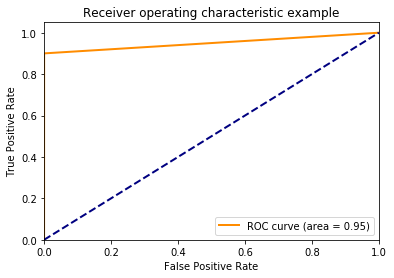

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predict)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Confusion matrix, without normalization
[[110031     19]
 [    47    424]]
Normalized confusion matrix
[[1.00e+02 1.73e-02]
 [9.98e+00 9.00e+01]]


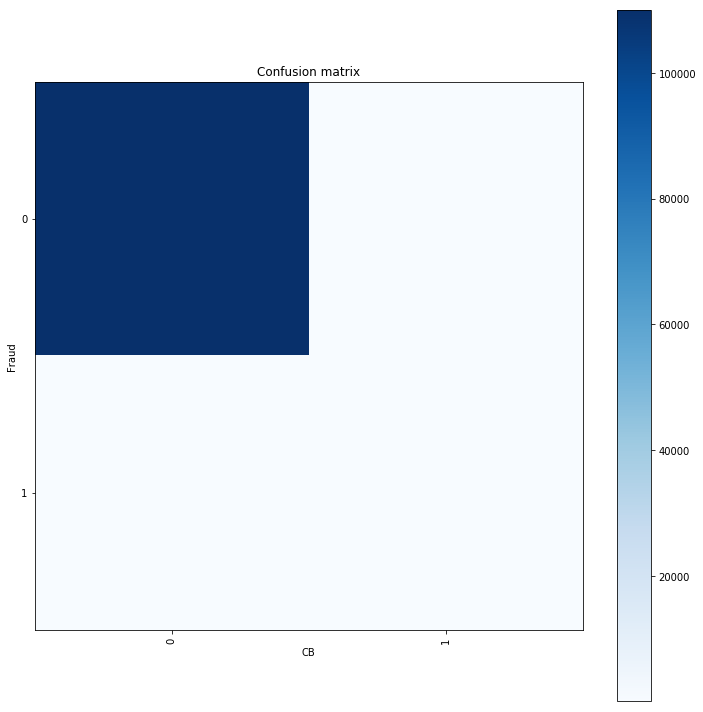

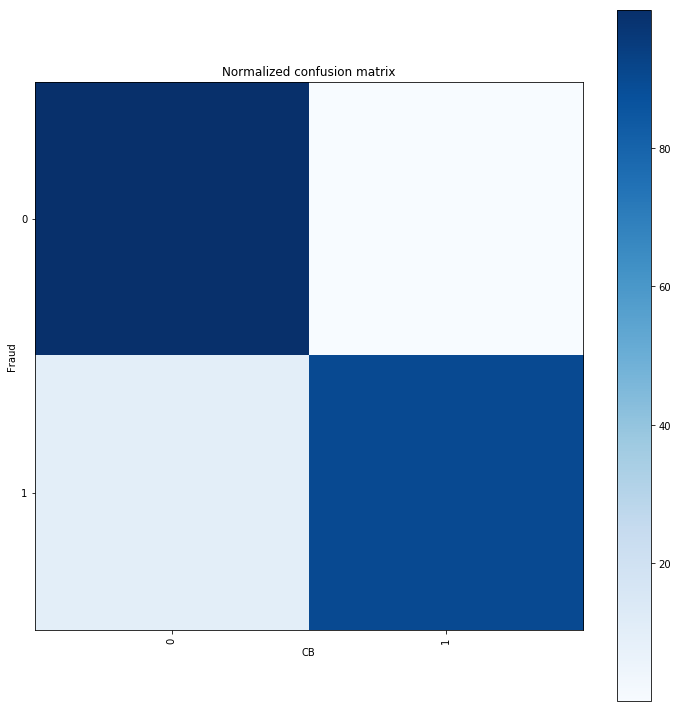

In [36]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float')*100 / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [24]:
for i in range(44):
    print(data.columns.values[importances_rank[i]]+","+str(i+1))

宿泊代表者フルネーム,1
Billing フルネーム,2
会員 フルネーム,3
トランザクション 合計 金額,4
InAuth ユーザエージェント OS,5
InAuth ブラウザ ナビゲータ 言語,6
ドメイン長さ,7
InAuthブラウザクライアント情報言語,8
メールドメイン,9
メール数字,10
クレンズ済課金電話番号,11
クレンズ済課金電話番号81,12
InAuth デバイス 実IPアドレス,13
チェックイン時間,14
ユーザ―長さ,15
dtime,16
InAuth デバイス位置経度,17
Billing POST_CODE,18
Billing POST_CODE緯度,19
Billing 住所,20
InAuth デバイス位置緯度,21
会員 Emailアドレス,22
Billing Emailアドレス,23
メールユーザーネーム,24
Billing POST_CODE経度,25
会員ID,26
InAuth デバイス位置情報 地域,27
メール長さ,28
InAuth デバイス位置情報 都市,29
InAuthデバイスID,30
IPアドレス,31
宿泊先名,32
クレジットカード名義,33
宿泊ID,34
トランザクション時間,35
InAuth デバイス 実IP 国名,36
チェックアウト時間,37
InAuth デバイス位置情報 国コード　,38
lang_comp,39
不正,40
チェックイン曜日,41
チェックアウト曜日,42
トランザクション曜日,43
会員登録曜日,44


In [37]:
import pickle

filename = 'finalized_model2.sav'
pickle.dump(clf, open(filename, 'wb'))